In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly_express as px
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [74]:
data=pd.read_csv('Breast_Cancer.csv',encoding='latin-1')

In [75]:
data.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4023 non-null   int32
 1   Marital Status          4023 non-null   int32
 2   T Stage                 4023 non-null   int32
 3   N Stage                 4023 non-null   int32
 4   6th Stage               4023 non-null   int32
 5   differentiate           4023 non-null   int32
 6   Grade                   4023 non-null   int32
 7   A Stage                 4023 non-null   int32
 8   Estrogen Status         4023 non-null   int32
 9   Progesterone Status     4023 non-null   int32
 10  Status                  4023 non-null   int32
 11  Age                     4023 non-null   int64
 12  Tumor Size              4023 non-null   int64
 13  Regional Node Examined  4023 non-null   int64
 14  Reginol Node Positive   4023 non-null   int64
 15  Survival Months         40

In [76]:
data.shape

(4024, 16)

In [77]:
data.duplicated().sum()

1

In [78]:
data.drop_duplicates(inplace=True)

In [79]:
data.duplicated().sum()

0

In [80]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

<Axes: >

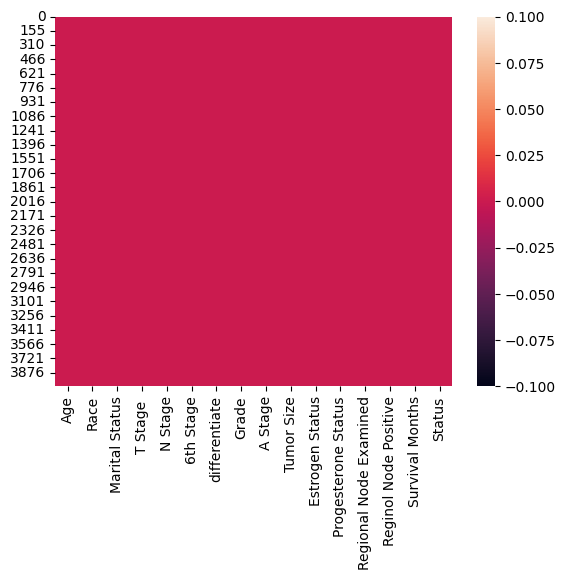

In [81]:
sns.heatmap(data=data.isnull())

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score ,f1_score ,recall_score ,precision_score,classification_report
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [83]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

<Axes: xlabel='Status', ylabel='count'>

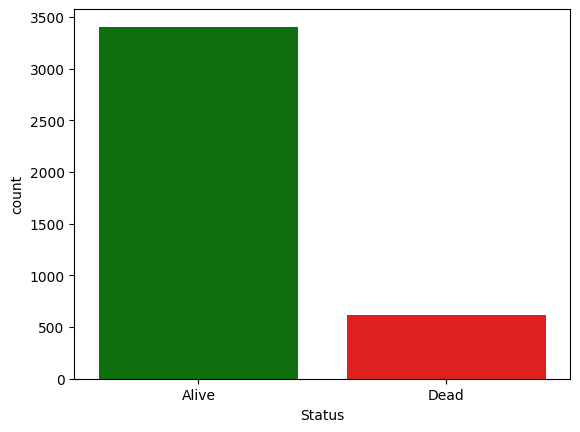

In [84]:
sns.countplot(x='Status',data=data,palette=['green','red'])

In [85]:
data.Status.value_counts()

Status
Alive    3407
Dead      616
Name: count, dtype: int64

In [86]:
la=LabelEncoder()

In [87]:
obj=data.select_dtypes(include='object')
nan=data.select_dtypes(exclude='object')

In [88]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])


In [89]:
obj=obj.astype('int')

In [90]:
data=pd.concat([obj,nan],axis=1)

In [91]:
data.head(5)

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4023 non-null   int32
 1   Marital Status          4023 non-null   int32
 2   T Stage                 4023 non-null   int32
 3   N Stage                 4023 non-null   int32
 4   6th Stage               4023 non-null   int32
 5   differentiate           4023 non-null   int32
 6   Grade                   4023 non-null   int32
 7   A Stage                 4023 non-null   int32
 8   Estrogen Status         4023 non-null   int32
 9   Progesterone Status     4023 non-null   int32
 10  Status                  4023 non-null   int32
 11  Age                     4023 non-null   int64
 12  Tumor Size              4023 non-null   int64
 13  Regional Node Examined  4023 non-null   int64
 14  Reginol Node Positive   4023 non-null   int64
 15  Survival Months         40

Create Model

In [93]:
x=data.drop(['Status'],axis=1)
y=data.Status

In [94]:
rs=RandomOverSampler(random_state=41)
x_res,y_res=rs.fit_resample(x,y)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=21)

In [96]:
model1=RandomForestClassifier()
model2=GradientBoostingClassifier()
model3=LogisticRegression()
model4=SVC()
model5=KNeighborsClassifier()
model6=XGBClassifier()

In [97]:
def pred(model1):
    model1.fit(x_train,y_train)
    pre=model1.predict(x_test)
    print(classification_report(y_test,pre))

In [98]:
pred(model1)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       686
           1       0.95      1.00      0.97       677

    accuracy                           0.97      1363
   macro avg       0.97      0.97      0.97      1363
weighted avg       0.97      0.97      0.97      1363



In [99]:
pred(model2)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       686
           1       0.84      0.76      0.80       677

    accuracy                           0.81      1363
   macro avg       0.81      0.81      0.81      1363
weighted avg       0.81      0.81      0.81      1363



In [100]:
pred(model3)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       686
           1       0.81      0.75      0.78       677

    accuracy                           0.79      1363
   macro avg       0.79      0.79      0.79      1363
weighted avg       0.79      0.79      0.79      1363



In [101]:
pred(model4)

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       686
           1       0.85      0.69      0.76       677

    accuracy                           0.79      1363
   macro avg       0.80      0.78      0.78      1363
weighted avg       0.80      0.79      0.78      1363



In [102]:
pred(model5)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       686
           1       0.79      0.96      0.87       677

    accuracy                           0.86      1363
   macro avg       0.87      0.86      0.85      1363
weighted avg       0.87      0.86      0.85      1363



In [103]:
pred(model6)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       686
           1       0.92      1.00      0.96       677

    accuracy                           0.96      1363
   macro avg       0.96      0.96      0.96      1363
weighted avg       0.96      0.96      0.96      1363



In [104]:
import pickle
file_name='breast.sav'
pickle.dump(model5,open(file_name,'wb'))